# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame

pd_merge = mouse_metadata.merge(study_results)


# Display the data table for preview

pd_merge.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# Checking the number of mice.

pd_merge['Mouse ID'].count()

1893

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

pd_duplicates = pd_merge.pivot_table(index = ['Mouse ID'], aggfunc = 'size')
pd_duplicates




Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 249, dtype: int64

In [71]:
#dropping the duplicate values of Mouse ID



pd_unique = pd_merge.drop_duplicates(subset=['Mouse ID'])
pd_unique

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [72]:
# Checking the number of mice in the clean DataFrame.
pd_unique['Mouse ID'].count() - 1

248

In [82]:
pd_drug = pd_merge.groupby(by='Drug Regimen')
pd_drug.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Summary Statistics

In [137]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

pd_drug_mean = pd_drug[['Tumor Volume (mm3)']].mean()
pd_drug_med = pd_drug[['Tumor Volume (mm3)']].median()
pd_drug_std = pd_drug[['Tumor Volume (mm3)']].std()
pd_drug_var = pd_drug_std * pd_drug_std
pd_drug_sem = pd_drug_var = pd_drug[['Tumor Volume (mm3)']].sem()

pd_var = pd_drug_std * pd_drug_std

merge1 = pd_drug_mean.merge(pd_drug_med, on='Drug Regimen')
merge2 = merge1.merge(pd_var, on='Drug Regimen')
merge3 = merge2.merge(pd_drug_std, on='Drug Regimen')
pd_stats = merge3.merge(pd_drug_sem, on='Drug Regimen')

pd_stats.columns=['Mean Tumor Volume' , 'Median Tumor Volume' , 'Tumor Volume Variance' , 'Tumor Volume Standard Deviation' , 'Tumor Volume Standard Error']

pd_stats.head()



/var/folders/yd/nx3j_v1j3hj2pbltnq5y9bb40000gn/T/ipykernel_8865/3153268923.py:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Tumor Volume (mm3)_x'} in the result is deprecated and will raise a MergeError in a future version.
  merge3 = merge2.merge(pd_drug_std, on='Drug Regimen')


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

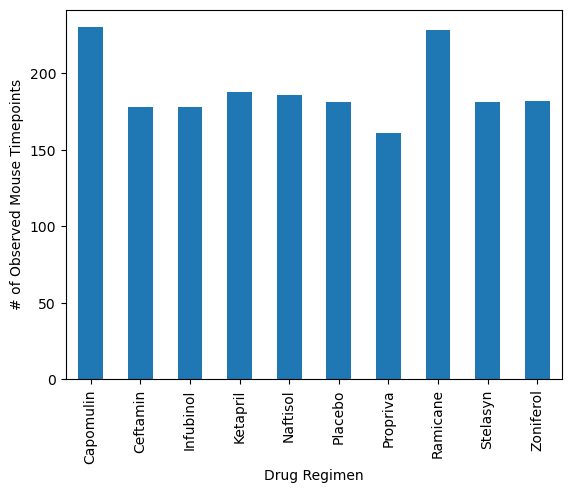

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

pd_drop = pd_merge.groupby('Drug Regimen', sort=True, as_index=False).count()
pd_mouse_time = pd_drop.set_index('Drug Regimen')

pd_mouse_time['Mouse ID'].plot.bar(xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

<BarContainer object of 10 artists>

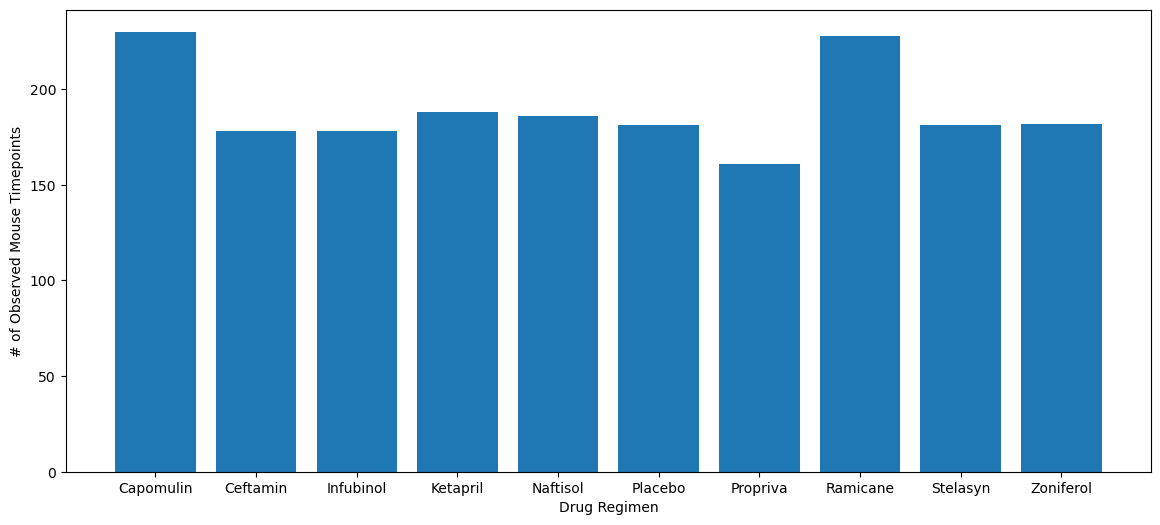

In [168]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = pd_drop['Drug Regimen']
mouse = pd_drop['Mouse ID']

fig = plt.subplots(figsize =(14, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.bar(regimen, mouse)

<Axes: ylabel='Sex'>

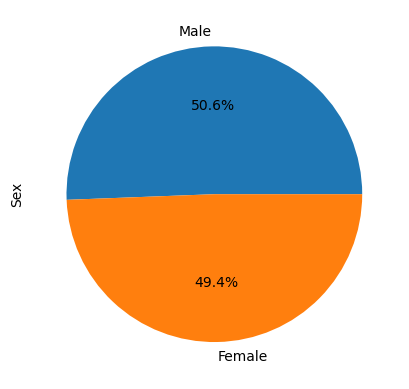

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pd_sex = pd_merge.groupby('Sex', sort=False, as_index=False).count()
pd_sex1 = pd_sex.set_index('Sex')

pd_sex1['Mouse ID'].plot.pie(ylabel='Sex', autopct='%1.1f%%')

In [182]:
pd_sex.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Male,958,958,958,958,958,958,958
1,Female,935,935,935,935,935,935,935


([<matplotlib.patches.Wedge at 0x7fac0c9792a0>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

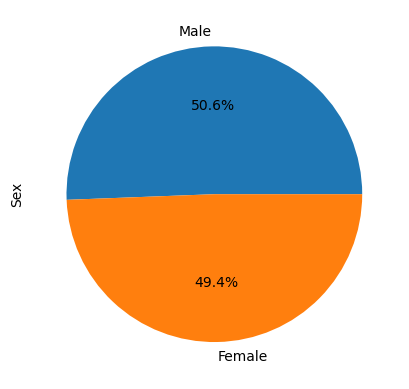

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse = pd_sex['Mouse ID']
labels = ['Male' , 'Female']

plt.ylabel('Sex')

plt.pie(mouse, labels=labels, autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [266]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

df_time = pd_merge.query("Timepoint == 20")
df_time.head()

df_treat = df_time.loc[(df_time["Drug Regimen"] != 'Propriva') & (df_time["Drug Regimen"] != 'Placebo') & (df_time["Drug Regimen"] != 'Ketapril') & (df_time["Drug Regimen"] != 'Naftisol') & (df_time["Drug Regimen"] != 'Stelasyn') & (df_time["Drug Regimen"] != 'Zoniferol')]
df_treat


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
4,k403,Ramicane,Male,21,16,20,32.997729,1
14,s185,Capomulin,Female,3,17,20,36.866876,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
34,m601,Capomulin,Male,22,17,20,34.255732,1
44,g791,Ramicane,Male,11,16,20,41.211897,0
...,...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,20,51.914910,2
1808,y163,Infubinol,Female,17,27,20,54.571076,1
1840,y769,Ceftamin,Female,6,27,20,55.025724,2
1850,y865,Ceftamin,Male,23,26,20,52.361982,1


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen', ylabel='Final Tumor Volume (mm3)'>

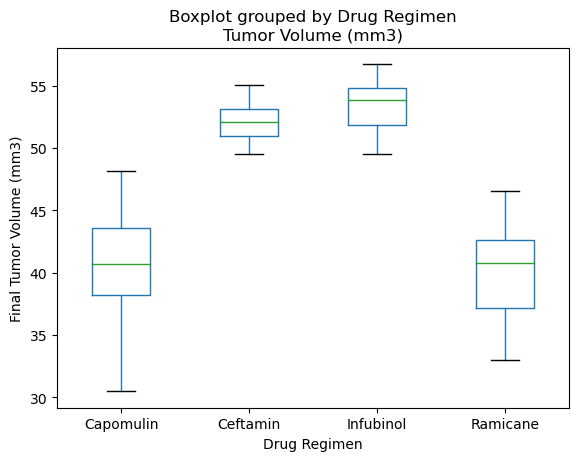

In [267]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df_treat.boxplot(by = 'Drug Regimen', column = ['Tumor Volume (mm3)'], grid = False, ylabel = 'Final Tumor Volume (mm3)')

## Line and Scatter Plots

In [276]:
df_capomulin = pd_merge.loc[pd_merge["Drug Regimen"] == 'Capomulin']
df_capomulin
df_cap = df_capomulin.loc[df_capomulin["Mouse ID"] == 'r157']
df_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


<Axes: xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

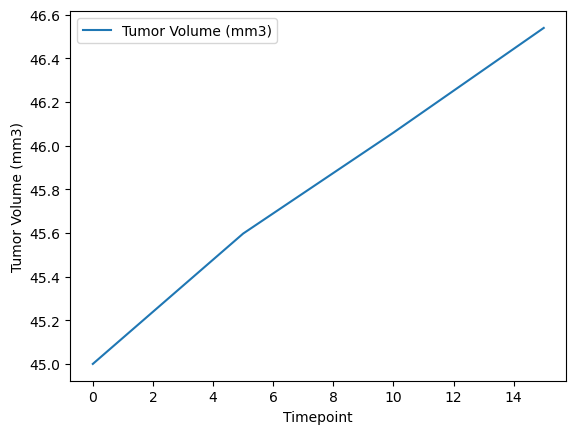

In [279]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_cap.plot(x = 'Timepoint' , y='Tumor Volume (mm3)', ylabel = 'Tumor Volume (mm3)')

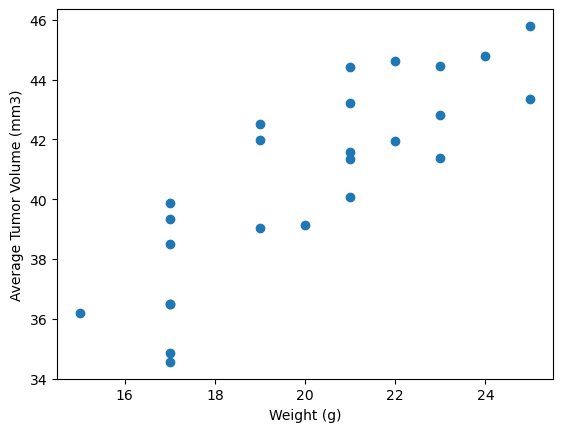

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


In [353]:
df_capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


## Correlation and Regression

<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

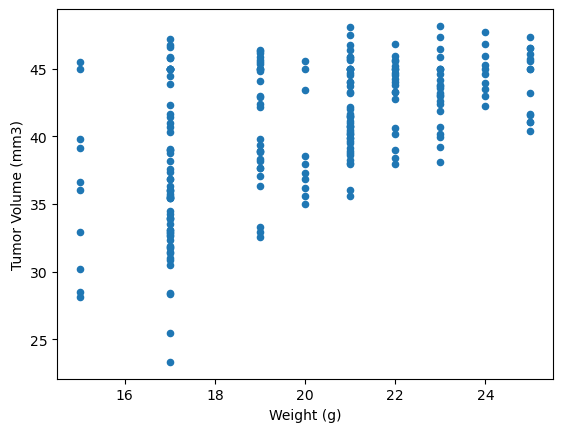

In [354]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

df_capomulin.plot.scatter(x = "Weight (g)" , y = "Tumor Volume (mm3)")
